___

<a href='http://www.pieriandata.com'></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Применение K Means для квантования цветов

### Imports


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# matplotlib.image - библиотека для работы с изображениями
# .jpg, .png, ... -> Массив numpy
import matplotlib.image as mpimg

### Изображение

In [3]:
image_as_array = mpimg.imread('palm_trees.jpg')

In [ ]:
# RGB-коды для каждого пикселя
image_as_array 

In [ ]:
image_as_array.shape # H, W, C

(1401, 934, 3)

In [ ]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)
# imshow - работает только с массивами nampy

## Квантование цветов с помощью Kmeans

Мы уменьшим количество различных цветов до K штук. Давайте попробуем оставить всего 6 цветов!

### Преобразуем данные из 3d в 2d

Kmeans работает с двумерными данными (строки с данными и колонки с признаками), поэтому мы поменяем форму данных следующим образом: (h,w,c) ---> (h * w,c)

In [9]:
(h,w,c) = image_as_array.shape

In [10]:
h

1401

In [11]:
w

934

In [12]:
c

3

In [13]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [14]:
image_as_array2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [15]:
image_as_array2d.shape

(1308534, 3)

In [17]:
len(image_as_array2d.shape)

2

In [16]:
from sklearn.cluster import KMeans

Примем к-во классов = 6

In [21]:
model = KMeans(n_clusters=6, n_init='auto')

In [22]:
model

KMeans(n_clusters=6, n_init='auto')

In [23]:
labels = model.fit_predict(image_as_array2d)

In [24]:
labels

array([2, 2, 2, ..., 1, 1, 1])

In [ ]:
# Это 6 цветовых RGB-кодов (именно в таком порядке - R G B!
model.cluster_centers_

array([[195.89837882, 154.54538772, 104.64243137],
       [  2.76329228,   2.58048182,   3.70431646],
       [ 72.37162875, 110.21509678, 138.20665934],
       [ 67.20546262,  61.71398327,  62.35322791],
       [219.35624792, 133.5935864 ,  43.831768  ],
       [141.06681631, 145.09508612, 142.62465897]])

In [26]:
# Округлим данные и преобразуем в целые числа
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [27]:
rgb_codes

array([[196, 155, 105],
       [  3,   3,   4],
       [ 72, 110, 138],
       [ 67,  62,  62],
       [219, 134,  44],
       [141, 145, 143]])

In [28]:
rgb_codes[labels]

array([[ 72, 110, 138],
       [ 72, 110, 138],
       [ 72, 110, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [29]:
rgb_codes[labels].shape

(1308534, 3)

In [30]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [31]:
quantized_image

array([[[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

In [32]:
quantized_image.shape

(1401, 934, 3)

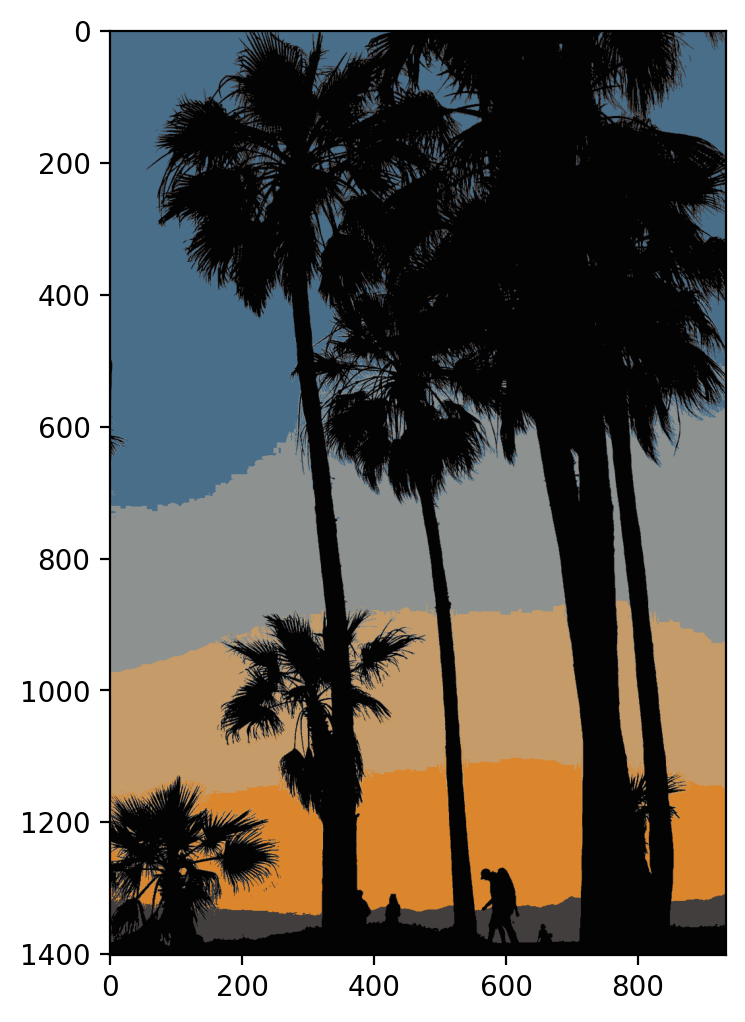

In [33]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)